Exercise in section 2.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

In [2]:
a = 1/2
N = 8
E_0 = 1/2

In [ ]:
x_exact = np.linspace(0.0, 2.0, 50)
x_pimc = np.linspace(0.0, 2.0, 10)

# Harmonic oscillator

In [3]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [4]:
harmonic_oscillator = NonRelativisticSingleParticle1D(V=V_harmonic_oscillator, T=N*a, N=N)

In [5]:
propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact, ground_energy=E_0, ground_wavefunction=psi_ground)
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

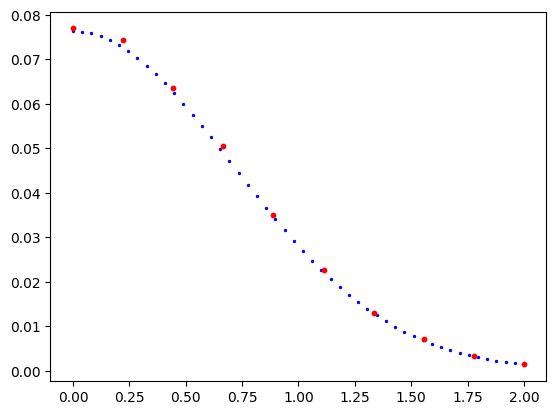

In [6]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()

In [7]:
for result in propagators_pimc_results:
    print(result.Q)

0.9672563886711416
0.39767206704899416
0.03844180256645997
0.3108469175540798
0.6255157181061708
0.7074053423866973
0.004734174851796726
0.3856430762441865
0.2849927902466175
0.6613608083809036


If all Qs are greater than $0.05$, it means that all points are statistically significant. 

# TODO:
- Output the goodness of the integration procedures
- Compare quantitatively Monte Carlo vs exact

# Potential $x^4/2$

In [24]:
def V_x4(x: float):
    return x ** 4 / 2

In [27]:
x4_system = NonRelativisticSingleParticle1D(V=V_x4, T=8, N=16)

In [31]:
propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-3, upper_bound=3, neval=20000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Computing...
Took 0.009546041488647461


In [32]:
for result in propagators_pimc_results:
    print(result.Q)

0.2077564101929287
9.26690090713087e-05
0.14521239424997945
0.7322818803288165
0.5921263163080039
0.03091932573128279
0.6416521525080404
0.0265205281294131
0.8486119875285927
3.2166560176242865e-14


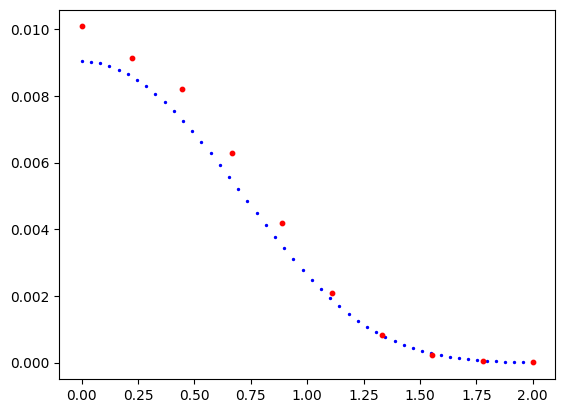

In [33]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()